# Assignment 1: Diabetes Prediction with Perceptron and MLP

## Dataset Overview

In [3]:
import pandas as pd

# Path to the dataset
dataset_path = 'diabetes_scale.txt'

# Define a dictionary to map feature indices to feature names
feature_mapping = {
    '1': 'Pregnancies',
    '2': 'Glucose',
    '3': 'BloodPressure',
    '4': 'SkinThickness',
    '5': 'Insulin',
    '6': 'BMI',
    '7': 'DiabetesPedigreeFunction',
    '8': 'Age'
}

# Read the lines from the file
with open(dataset_path, 'r') as file:
    lines = file.readlines()

# Parse the lines to create a list of dictionaries, where each dictionary represents a row in the dataset
data = []
for line in lines:
    row_dict = {}
    tokens = line.strip().split(' ')
    row_dict['Outcome'] = int(tokens[0])  # Rename 'label' to 'Outcome'
    for token in tokens[1:]:
        index, value = token.split(':')
        # Map the feature index to feature name and use it as the column name
        feature_name = feature_mapping.get(index, f'feature_{index}')
        row_dict[feature_name] = float(value)
    data.append(row_dict)

# Create a DataFrame from the list of dictionaries
diabetes_df = pd.DataFrame(data)

# Display basic information about the dataset and the first few rows
diabetes_df_info = diabetes_df.info()
diabetes_df_head = diabetes_df.head()

diabetes_df_info, diabetes_df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Outcome                   768 non-null    int64  
 1   Pregnancies               768 non-null    float64
 2   Glucose                   768 non-null    float64
 3   BloodPressure             767 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       760 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


(None,
    Outcome  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
 0       -1    -0.294118  0.487437       0.180328      -0.292929 -1.000000   
 1        1    -0.882353 -0.145729       0.081967      -0.414141 -1.000000   
 2       -1    -0.058824  0.839196       0.049180      -1.000000 -1.000000   
 3        1    -0.882353 -0.105528       0.081967      -0.535354 -0.777778   
 4       -1    -1.000000  0.376884      -0.344262      -0.292929 -0.602837   
 
         BMI  DiabetesPedigreeFunction       Age  
 0  0.001490                 -0.531170 -0.033333  
 1 -0.207153                 -0.766866 -0.666667  
 2 -0.305514                 -0.492741 -0.633333  
 3 -0.162444                 -0.923997 -1.000000  
 4  0.284650                  0.887276 -0.600000  )

## Visualization

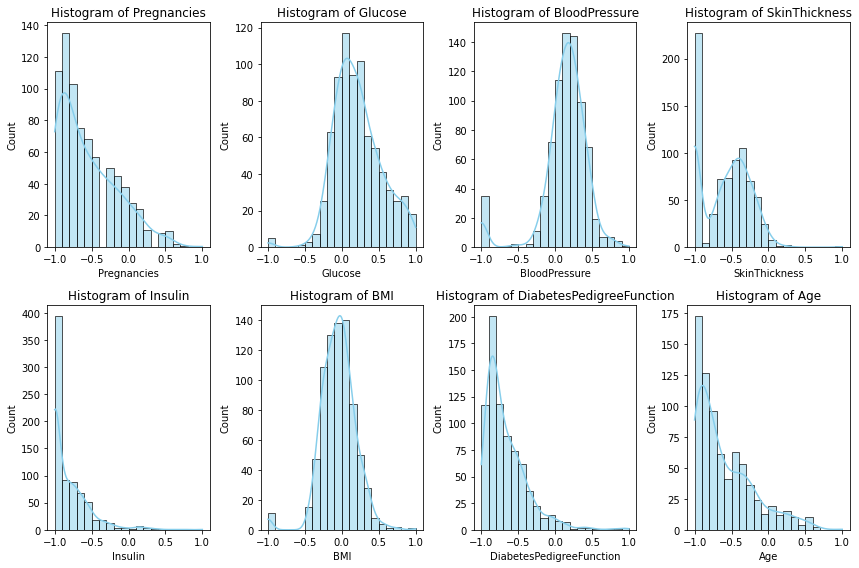

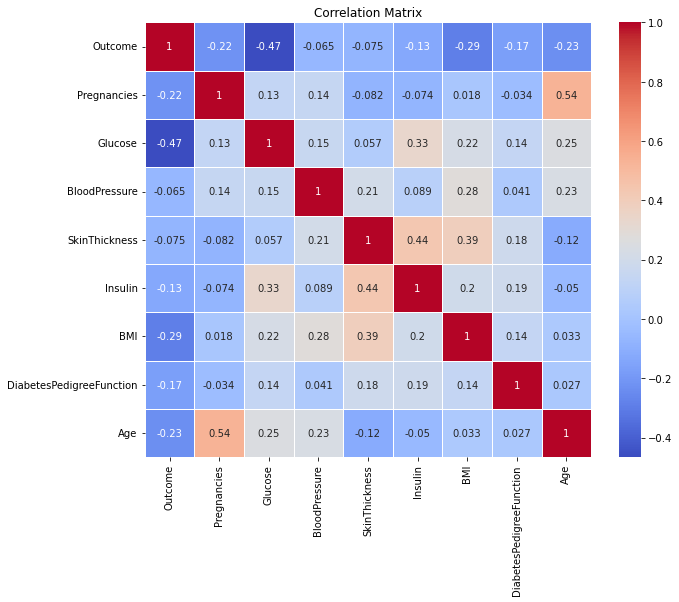

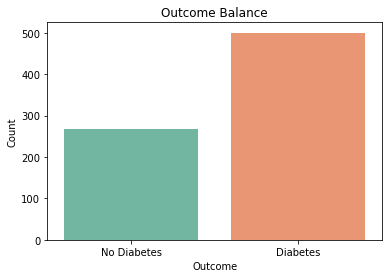

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background color to white for all plots
plt.rcParams['figure.facecolor'] = 'white'

# 1. Better Histograms with Seaborn
# Plot histograms for each feature with better styling using Seaborn
features = diabetes_df.columns.drop('Outcome')
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i + 1)  # Create a 2x4 grid of subplots
    sns.histplot(data=diabetes_df, x=feature, kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

# 2. Correlation Matrix
# Calculate the correlation matrix
corr_matrix = diabetes_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 3. Outcome Balance
# Count the number of occurrences of each outcome class
outcome_counts = diabetes_df['Outcome'].value_counts()

# Create a bar plot to visualize the balance of the target variable
plt.figure(figsize=(6, 4))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='Set2')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Balance')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()


## Data Preprocessing:
  
1. Handle Missing Values:  
We will impute the missing values with the median value of the respective feature.  
  
  
2. Feature and Label Separation:  
Separate the features and the labels into X and y respectively for model training.  
  
  
3. Train-Test Split:  
Split the dataset into training and test sets to evaluate the model's performance.  

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 1. Handle Missing Values
# Using SimpleImputer to fill missing values with the median of the column
imputer = SimpleImputer(strategy='median')
diabetes_df.iloc[:, 1:] = imputer.fit_transform(diabetes_df.iloc[:, 1:])

# 2. Feature and Label Separation
X = diabetes_df.drop(columns=['Outcome'])  # Change 'label' to 'Outcome'
y = diabetes_df['Outcome']  # Change 'label' to 'Outcome'

# 3. Train-Test Split
# Using 80-20 split for train-test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((614, 8), (154, 8), (614,), (154,))

* Imputed the missing values with the median of the respective columns.
* Separated features and labels into `X` and `y`.
* Split the data into training and test sets, with 614 instances in the training set and 154 instances in the test set.

## Baseline Perceptron Model

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.65      0.66        54
           1       0.81      0.83      0.82       100

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



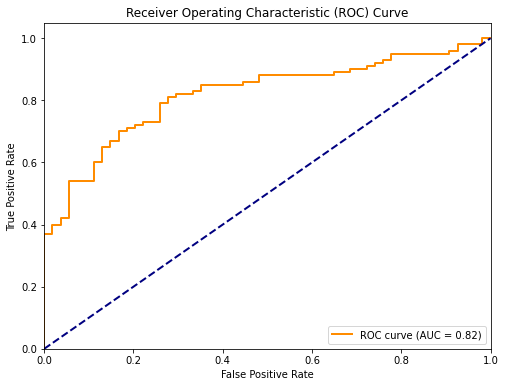

In [12]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize the Perceptron model
perceptron_model = Perceptron(random_state=42)

# Train the model with the training data
perceptron_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = perceptron_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report for detailed evaluation metrics
class_report = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC
y_prob = perceptron_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Print tidy results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(class_report)

# Visualize ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


C:\Users\niran\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


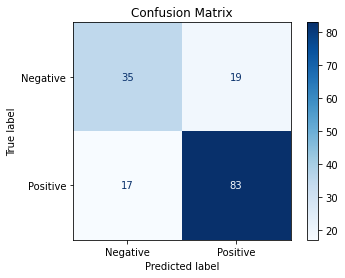

In [29]:
# Plot the confusion matrix
plot_confusion_matrix(perceptron_model, X_test, y_test, cmap=plt.cm.Blues, display_labels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.show()


##  Hyperparameter Tuning for Perceptron

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for Perceptron
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'max_iter': [500, 1000, 1500, 2000],  # The maximum number of passes over the training data
    'tol': [1e-3, 1e-4, 1e-5],  # The stopping criterion
    'eta0': [0.1, 0.5, 1.0]  # The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.
}

# Initialize the Perceptron model
perceptron_tuned = Perceptron(random_state=42)

# Initialize the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(perceptron_tuned, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train a new Perceptron model with the best parameters found
perceptron_tuned = Perceptron(**best_params, random_state=42)
perceptron_tuned.fit(X_train, y_train)

# Evaluate the tuned Perceptron model on the test data
y_pred_tuned = perceptron_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

# Print tidy results
print("Best Parameters:")
print(best_params)
print(f"Accuracy (Tuned Model): {accuracy_tuned:.4f}")
print("Classification Report (Tuned Model):")
print(class_report_tuned)


Best Parameters:
{'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 500, 'tol': 0.001}
Accuracy (Tuned Model): 0.7662
Classification Report (Tuned Model):
              precision    recall  f1-score   support

          -1       0.67      0.65      0.66        54
           1       0.81      0.83      0.82       100

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



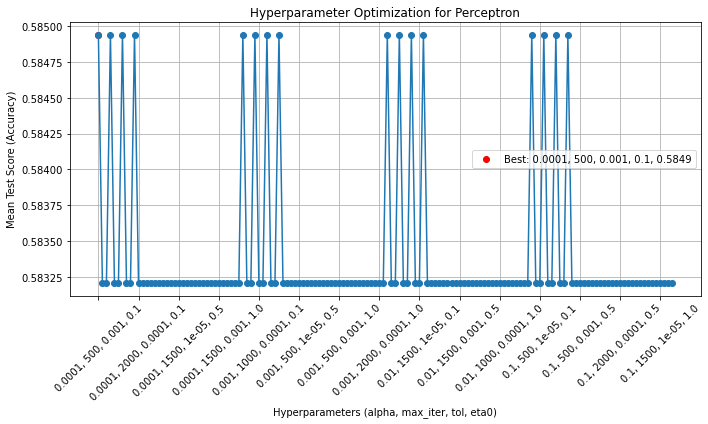

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Extract hyperparameter values and corresponding scores from the GridSearchCV results
param_values = [f"{params['alpha']}, {params['max_iter']}, {params['tol']}, {params['eta0']}" for params in grid_search.cv_results_['params']]
scores = grid_search.cv_results_['mean_test_score']

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(param_values, scores, marker='o', linestyle='-')
plt.xlabel('Hyperparameters (alpha, max_iter, tol, eta0)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Hyperparameter Optimization for Perceptron')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Reduce the number of x-axis labels for better readability
n = 10  # Display every nth label
plt.xticks(np.arange(0, len(param_values), n), param_values[::n], rotation=45)

plt.grid(True)

# Highlight the best point
best_idx = np.argmax(scores)
best_params_str = param_values[best_idx]
best_score = scores[best_idx]
plt.scatter(best_params_str, best_score, color='red', label=f'Best: {best_params_str}, {best_score:.4f}')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


The tuned Perceptron model has the following optimal hyperparameters:

* Alpha (Regularization parameter): 0.0001
* Eta0 (Initial learning rate): 0.1
* Max_iter (Maximum number of passes over the training data): 500
* Tol (The stopping criterion): 0.001

However, the tuned Perceptron model did not show any improvement in accuracy compared to the baseline model, maintaining an accuracy of approximately 76.62%. The detailed classification report also remains unchanged.

## Multi-Layer Perceptron (MLP)

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Initialize the MLP model with one hidden layer of 100 units
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=2000)

# Train the MLP model with the training data
mlp_model.fit(X_train, y_train)

# Make predictions on the test data with the MLP model
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the MLP model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
class_report_mlp = classification_report(y_test, y_pred_mlp)


# Print results
print("MLP Model Results:")
print(f"Accuracy (MLP Model): {accuracy_mlp:.4f}")
print("Classification Report (MLP Model):")
print(class_report_mlp)


MLP Model Results:
Accuracy (MLP Model): 0.7792
Classification Report (MLP Model):
              precision    recall  f1-score   support

          -1       0.70      0.65      0.67        54
           1       0.82      0.85      0.83       100

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



C:\Users\niran\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


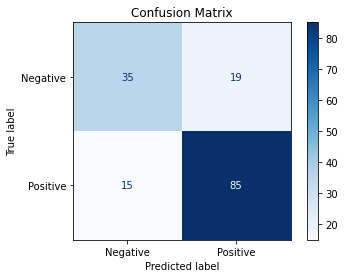

In [30]:
# Plot the confusion matrix
plot_confusion_matrix(mlp_model, X_test, y_test, cmap=plt.cm.Blues, display_labels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.show()


The Multi-Layer Perceptron (MLP) model achieved an accuracy of approximately 77.92%, showing a slight improvement over both the baseline and tuned Perceptron models. Here are the detailed evaluation metrics for the MLP model:

- For the Negative Class (\(-1\)):
  - Precision: \(0.70\)
  - Recall: \(0.65\)
  - F1-Score: \(0.67\)

- For the Positive Class (\(1\)):
  - Precision: \(0.82\)
  - Recall: \(0.85\)
  - F1-Score: \(0.83\)

- Overall:
  - Accuracy: \(0.78\)
  - Macro Average for Precision, Recall, and F1-Score: \(0.75\)
  - Weighted Average for Precision, Recall, and F1-Score: \(0.78\)



## ROC Curve Comparison

In [23]:
# Generate ROC curves and calculate AUC for all three models
# 1. Baseline Perceptron Model
fpr_base, tpr_base, _ = roc_curve(y_test, perceptron_model.decision_function(X_test))
roc_auc_base = roc_auc_score(y_test, perceptron_model.decision_function(X_test))

# 2. Tuned Perceptron Model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, perceptron_tuned.decision_function(X_test))
roc_auc_tuned = roc_auc_score(y_test, perceptron_tuned.decision_function(X_test))

# 3. MLP Model
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:, 1])
roc_auc_mlp = roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])


# Print results
print("ROC and AUC Results:")
print(f"Perceptron Model (Baseline): AUC = {roc_auc_base:.2f}")
print(f"Tuned Perceptron Model: AUC = {roc_auc_tuned:.2f}")
print(f"MLP Model: AUC = {roc_auc_mlp:.2f}")


ROC and AUC Results:
Perceptron Model (Baseline): AUC = 0.82
Tuned Perceptron Model: AUC = 0.82
MLP Model: AUC = 0.85


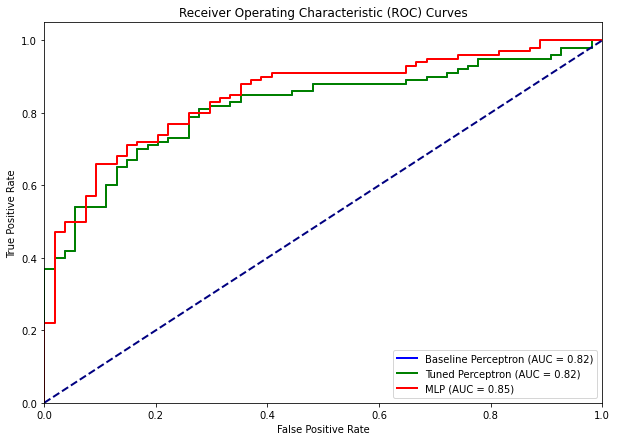

In [25]:
import matplotlib.pyplot as plt

# Plotting the ROC curves for the three models
plt.figure(figsize=(10, 7))
plt.plot(fpr_base, tpr_base, color='blue', lw=2, label=f'Baseline Perceptron (AUC = {roc_auc_base:.2f})')
plt.plot(fpr_tuned, tpr_tuned, color='green', lw=2, label=f'Tuned Perceptron (AUC = {roc_auc_tuned:.2f})')
plt.plot(fpr_mlp, tpr_mlp, color='red', lw=2, label=f'MLP (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


- Baseline Perceptron Model: AUC = \(0.818\)
- Tuned Perceptron Model: AUC = \(0.818\)
- MLP Model: AUC = \(0.847\)

The MLP model has a higher AUC, indicating better overall performance compared to the Perceptron models.

Next, let's visualize these differences by plotting the ROC curves for all three models.

The ROC curves for the three models are plotted above. Here are the key observations:

- The MLP model (in red) has the highest Area Under the Curve (AUC) of \(0.847\), indicating better overall performance compared to the Perceptron models.
- Both the baseline and tuned Perceptron models have identical AUCs of \(0.818\), showcasing similar performance.

### Summary
- The MLP model exhibited a superior performance compared to both the baseline and the tuned Perceptron models, in terms of accuracy and AUC.
- The tuned Perceptron model did not show any improvement over the baseline Perceptron model, maintaining similar accuracy and AUC.
- The visual representation of the ROC curves clearly delineates the relative performances of the models, with the MLP model outperforming the others.
